In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

## Rad sa tablicom seasons

In [2]:
seasons = pd.read_csv("seasons.csv")
seasons.shape

(19, 7)

Sa shape funkcijom provjerili smo koliko imamo stupaca i redaka zatim sa head pogeldamo kako nam izgleda prvi 5 redaka

In [3]:
seasons.head()

,season,years,dayzero,regionW,regionX,regionY,regionZ
0,A,1995-1996,10/30/1995,East,Midwest,Southeast,West
1,B,1996-1997,10/28/1996,East,Southeast,Midwest,West
2,C,1997-1998,10/27/1997,East,West,Midwest,South
3,D,1998-1999,10/26/1998,East,Midwest,South,West
4,E,1999-2000,11/01/1999,Midwest,West,East,South


Nakon toga sa funkcijama describe i info detaljnije pogledamo vrijednosti i tipove podataka koji se nalaze u tablici seasons

In [4]:
seasons.describe()

,season,years,dayzero,regionW,regionX,regionY,regionZ
count,19,19,19,19,19,19,19
unique,19,19,19,4,7,7,6
top,A,1995-1996,10/30/1995,East,South,Midwest,West
freq,1,1,1,15,6,9,12


Posto vidimo da u svih 19 zapisa imamo 19 razliciti vrijednosti za years mozemo ga dropati a ako nam bude trebati opet mozemo ga nagenerirati pomocu dayzero

In [5]:
seasons.drop((['years']), axis=1, inplace=True)

In [6]:
seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   season   19 non-null     object
 1   dayzero  19 non-null     object
 2   regionW  19 non-null     object
 3   regionX  19 non-null     object
 4   regionY  19 non-null     object
 5   regionZ  19 non-null     object
dtypes: object(6)
memory usage: 1.0+ KB


Zatim cemo pogledati imamo li atributa sa null vrijednostima

In [7]:
seasons.isna().sum()

season     0
dayzero    0
regionW    0
regionX    0
regionY    0
regionZ    0
dtype: int64

Sada cemo labelirati stupce season i region da nam budu int a ne object te cemo promjeniti dayzero iz object u datetime

In [8]:
season_map = {season: i for i, season in enumerate(pd.unique(seasons[['season']].values.ravel('K')))}
region_map = {region: i for i, region in
              enumerate(pd.unique(seasons[['regionW', 'regionX', 'regionY', 'regionZ']].values.ravel('K')))}

seasons['season'] = seasons['season'].map(season_map)
seasons['regionW'] = seasons['regionW'].map(region_map)
seasons['regionX'] = seasons['regionX'].map(region_map)
seasons['regionY'] = seasons['regionY'].map(region_map)
seasons['regionZ'] = seasons['regionZ'].map(region_map)

seasons.head()

,season,dayzero,regionW,regionX,regionY,regionZ
0,0,10/30/1995,0,1,4,5
1,1,10/28/1996,0,4,1,5
2,2,10/27/1997,0,5,1,6
3,3,10/26/1998,0,1,6,5
4,4,11/01/1999,1,5,0,6


In [9]:
seasons['dayzero'] = pd.to_datetime(seasons['dayzero'])

In [10]:
seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   season   19 non-null     int64         
 1   dayzero  19 non-null     datetime64[ns]
 2   regionW  19 non-null     int64         
 3   regionX  19 non-null     int64         
 4   regionY  19 non-null     int64         
 5   regionZ  19 non-null     int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 1.0 KB


In [11]:
seasons.nunique()

season     19
dayzero    19
regionW     4
regionX     7
regionY     7
regionZ     6
dtype: int64

Kao sto vidimo season nam je monoton al ce nam trebati za povezati ovu tablicu sa ostalima pa cemo ga kasnije moci dropati

## Rad sa tablicom tournery_results

In [12]:
tourney_results = pd.read_csv("tourney_results.csv")
tourney_results.shape

(1156, 7)

In [13]:
tourney_results.head()

,season,daynum,wteam,wscore,lteam,lscore,numot
0,A,136,515,86,729,80,NaN
1,A,136,559,68,555,59,NaN
2,A,136,576,75,666,63,NaN
3,A,136,581,75,577,60,NaN
4,A,136,604,81,551,74,NaN


In [14]:
tourney_results.describe()

,daynum,wteam,wscore,lteam,lscore,numot
count,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,585.000000
mean,139.143599,682.515571,75.549308,686.699827,63.667820,0.075214
std,4.213580,98.684397,10.941410,103.201450,10.567058,0.311565
min,134.000000,504.000000,43.000000,502.000000,29.000000,0.000000
25%,136.000000,606.000000,68.000000,603.750000,57.000000,0.000000
50%,137.000000,671.000000,75.000000,681.500000,63.000000,0.000000
75%,139.000000,783.000000,82.000000,783.000000,70.000000,0.000000
max,154.000000,853.000000,121.000000,853.000000,105.000000,2.000000


In [15]:
tourney_results.isna().sum()

season      0
daynum      0
wteam       0
wscore      0
lteam       0
lscore      0
numot     571
dtype: int64

Vidimo da atribut num ot ima oko 50 posto null vrijednosti sad imamo par mogucnosti mozemo staviti na nulu no to bi nam smanjilo broj produzetaka u prosjeku i imali bi krivu statistiku mozemo staviti na prosjecnu vrijenost sto je 0.07 produzetaka u prosjeku ali ovo nam je cijelobrojni atribut i treca opcija za koju sam se ja odlucio je da dropam taj stupac jer cemo vidjeti u rezultatu utakmice koliko je usitinu ta utakmica bila blizu

In [16]:
tourney_results.drop((['numot']), axis=1, inplace=True)
tourney_results.head()

,season,daynum,wteam,wscore,lteam,lscore
0,A,136,515,86,729,80
1,A,136,559,68,555,59
2,A,136,576,75,666,63
3,A,136,581,75,577,60
4,A,136,604,81,551,74


Zatim namapiramo sa istim maperom koji smo koristili i za tablicu seasons atribut seasons

In [17]:
tourney_results['season'] = tourney_results['season'].map(season_map)
tourney_results.head()

,season,daynum,wteam,wscore,lteam,lscore
0,0,136,515,86,729,80
1,0,136,559,68,555,59
2,0,136,576,75,666,63
3,0,136,581,75,577,60
4,0,136,604,81,551,74


In [18]:
tourney_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   season  1156 non-null   int64
 1   daynum  1156 non-null   int64
 2   wteam   1156 non-null   int64
 3   wscore  1156 non-null   int64
 4   lteam   1156 non-null   int64
 5   lscore  1156 non-null   int64
dtypes: int64(6)
memory usage: 54.3 KB


In [19]:
tourney_results.nunique()

season     18
daynum     12
wteam     155
wscore     67
lteam     258
lscore     66
dtype: int64

Vidimo da nemamo nekih monotonih atributa pa ne dropamo nista

## Rad sa tablicom teams

In [20]:
teams = pd.read_csv("teams.csv")
teams.shape

(356, 2)

In [21]:
teams.head()

,id,name
0,501,Abilene Chr
1,502,Air Force
2,503,Akron
3,504,Alabama
4,505,Alabama A&M


In [22]:
teams.describe()

,id
count,356.000000
mean,678.500000
std,102.912584
min,501.000000
25%,589.750000
50%,678.500000
75%,767.250000
max,856.000000


In [23]:
teams.isna().sum()

id      0
name    0
dtype: int64

In [24]:
teams.nunique()

id      356
name    356
dtype: int64

Vidimo da tablica teams ima sve unique vrijednosti no to je ocekivano ne mozemo dropat id jer ce nam trebati za povezivanje sa drugim tablicama

## Rad sa tablicom tourney_seeds

In [25]:
tourney_seeds = pd.read_csv("tourney_seeds.csv")
tourney_seeds.shape

(1242, 3)

In [26]:
tourney_seeds.head()

,season,seed,team
0,A,W01,663
1,A,W02,603
2,A,W03,796
3,A,W04,660
4,A,W05,729


In [27]:
tourney_seeds.describe()

,team
count,1242.000000
mean,685.844605
std,103.133122
min,502.000000
25%,603.000000
50%,680.000000
75%,783.000000
max,853.000000


In [28]:
tourney_seeds.isna().sum()

season    0
seed      0
team      0
dtype: int64

Mapiramo atribut seeds pomocu mapera sto smo koristili za tablice season i tourney results

In [29]:
tourney_seeds['season'] = tourney_seeds['season'].map(season_map)
tourney_seeds.head()

,season,seed,team
0,0,W01,663
1,0,W02,603
2,0,W03,796
3,0,W04,660
4,0,W05,729


Zatim cemo splitati stupac seed u dva stupca seed region i seed number tako da ih mozemo koristit u klasifikaciji

In [30]:
tourney_seeds['seed_region'], tourney_seeds['seed_number'] = tourney_seeds['seed'].str[:1], tourney_seeds['seed'].str[1:3]
tourney_seeds.drop((['seed']), axis=1, inplace=True)
tourney_seeds['seed_number'] = tourney_seeds['seed_number'].astype(str).astype(int)

tourney_seeds.head()

,season,team,seed_region,seed_number
0,0,663,W,1
1,0,603,W,2
2,0,796,W,3
3,0,660,W,4
4,0,729,W,5


I nakon toga cemo mapirati seed region da nam i on bude int

In [31]:
wxyz_map = {seed_region: i for i, seed_region in enumerate(pd.unique(tourney_seeds[['seed_region']].values.ravel('K')))}
tourney_seeds['seed_region'] = tourney_seeds['seed_region'].map(wxyz_map)

tourney_seeds.head()

,season,team,seed_region,seed_number
0,0,663,0,1
1,0,603,0,2
2,0,796,0,3
3,0,660,0,4
4,0,729,0,5


In [32]:
tourney_seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   season       1242 non-null   int64
 1   team         1242 non-null   int64
 2   seed_region  1242 non-null   int64
 3   seed_number  1242 non-null   int32
dtypes: int32(1), int64(3)
memory usage: 34.1 KB


In [33]:
tourney_seeds.nunique()

season          19
team           262
seed_region      4
seed_number     16
dtype: int64

## Rad sa tablicom tourney_slots

In [34]:
tourney_slots = pd.read_csv("tourney_slots.csv")
tourney_slots.shape

(1223, 4)

In [35]:
tourney_slots.head()

,season,slot,strongseed,weakseed
0,A,R1W1,W01,W16
1,A,R1W2,W02,W15
2,A,R1W3,W03,W14
3,A,R1W4,W04,W13
4,A,R1W5,W05,W12


In [36]:
tourney_slots.describe()

,season,slot,strongseed,weakseed
count,1223,1223,1223,1223
unique,19,74,74,74
top,S,R1W1,W01,W16
freq,67,19,19,19


In [37]:
tourney_slots.isna().sum()

season        0
slot          0
strongseed    0
weakseed      0
dtype: int64

Sada cemo namapirati sezonu pomocu vec koristenog mapera

In [38]:
tourney_slots['season'] = tourney_slots['season'].map(season_map)
tourney_slots.head()

,season,slot,strongseed,weakseed
0,0,R1W1,W01,W16
1,0,R1W2,W02,W15
2,0,R1W3,W03,W14
3,0,R1W4,W04,W13
4,0,R1W5,W05,W12


Nakon toga cemo pomocu splitanja stupca slot dobiti u kojoj je rundi koji slot

In [39]:
tourney_slots['round'] = tourney_slots['slot'].str[1:2]

tourney_slots

,season,slot,strongseed,weakseed,round
0,0,R1W1,W01,W16,1
1,0,R1W2,W02,W15,1
2,0,R1W3,W03,W14,1
3,0,R1W4,W04,W13,1
4,0,R1W5,W05,W12,1
...,...,...,...,...,...
1218,18,R4Y1,R3Y1,R3Y2,4
1219,18,R4Z1,R3Z1,R3Z2,4
1220,18,R5WX,R4W1,R4X1,5
1221,18,R5YZ,R4Y1,R4Z1,5


Probao sam takoder splitati dodatno da vidimo ko je favorit no nisam uspio zato sto se mijenja format zapisa kada dodjemo do polufinala , takoder sam htio splitati i strongseed i weekseed u stupce kao u tablici tourney_seed no i tu se mijenja format. To su dijelovi sa kojim bi se trebao jos pozabaviti jer mislim da bi to bilo korisno.

## Rad sa tablicom regular_seasons_results

In [40]:
regular_season_results = pd.read_csv("regular_season_results.csv")
regular_season_results.shape

(91224, 8)

In [41]:
regular_season_results.head()

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
0,A,16,511,91,647,57,H,NaN
1,A,16,515,75,812,67,H,NaN
2,A,16,606,87,658,67,H,NaN
3,A,16,670,73,573,65,H,NaN
4,A,16,721,99,632,68,H,NaN


In [42]:
regular_season_results.describe()

,daynum,wteam,wscore,lteam,lscore,numot
count,91224.000000,91224.000000,91224.000000,91224.000000,91224.000000,51333.000000
mean,73.410133,680.981058,75.370440,677.047400,63.208860,0.072000
std,34.210997,103.099502,11.408528,102.950054,10.940295,0.313278
min,0.000000,501.000000,34.000000,501.000000,20.000000,0.000000
25%,44.000000,592.000000,68.000000,587.000000,56.000000,0.000000
50%,75.000000,678.000000,75.000000,675.000000,63.000000,0.000000
75%,103.000000,772.000000,83.000000,768.000000,70.000000,0.000000
max,133.000000,856.000000,153.000000,856.000000,140.000000,6.000000


In [43]:
regular_season_results.isna().sum()

season        0
daynum        0
wteam         0
wscore        0
lteam         0
lscore        0
wloc          0
numot     39891
dtype: int64

Kao sto vidimo od 90 tisuca zapisa u tablici 39 tisuca ih ima null vrijednost za atribut numot kao i u tablici tourney_results imamo 3 mogucnosti, a ja samo opet odabrao istu da dropam stupac numot.

In [44]:
regular_season_results.drop((['numot']), axis=1, inplace=True)
regular_season_results.head()

,season,daynum,wteam,wscore,lteam,lscore,wloc
0,A,16,511,91,647,57,H
1,A,16,515,75,812,67,H
2,A,16,606,87,658,67,H
3,A,16,670,73,573,65,H
4,A,16,721,99,632,68,H


Zatim cemo namapirati atribut season sa vec koristenim maperom te cemo pomocu label encodera promjeniti atribut wloc iz stringa u int da ga mzoemo koristiti u klasifikaciji

In [45]:
regular_season_results['season'] = regular_season_results['season'].map(season_map)

le = LabelEncoder()
le.fit(regular_season_results.loc[:, 'wloc'])

regular_season_results.loc[:, 'wloc'] = le.transform(regular_season_results.loc[:, 'wloc'])
regular_season_results.head()

,season,daynum,wteam,wscore,lteam,lscore,wloc
0,0,16,511,91,647,57,1
1,0,16,515,75,812,67,1
2,0,16,606,87,658,67,1
3,0,16,670,73,573,65,1
4,0,16,721,99,632,68,1


In [46]:
regular_season_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91224 entries, 0 to 91223
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   season  91224 non-null  int64
 1   daynum  91224 non-null  int64
 2   wteam   91224 non-null  int64
 3   wscore  91224 non-null  int64
 4   lteam   91224 non-null  int64
 5   lscore  91224 non-null  int64
 6   wloc    91224 non-null  int32
dtypes: int32(1), int64(6)
memory usage: 4.5 MB


In [47]:
regular_season_results.nunique()

season     19
daynum    134
wteam     356
wscore    108
lteam     356
lscore    104
wloc        3
dtype: int64

## Vizualizacija podataka

In [48]:
X = pd.merge(seasons, tourney_results, on='season', how='outer')
X = pd.merge(X, teams, left_on='wteam', right_on='id', how='outer')
X.head()

,season,dayzero,regionW,regionX,regionY,regionZ,daynum,wteam,wscore,lteam,lscore,id,name
0,0.0,1995-10-30,0.0,1.0,4.0,5.0,136.0,515.0,86.0,729.0,80.0,515.0,Arkansas
1,0.0,1995-10-30,0.0,1.0,4.0,5.0,138.0,515.0,65.0,660.0,56.0,515.0,Arkansas
2,2.0,1997-10-27,0.0,5.0,1.0,6.0,136.0,515.0,74.0,698.0,65.0,515.0,Arkansas
3,3.0,1998-10-26,0.0,1.0,6.0,5.0,136.0,515.0,94.0,766.0,80.0,515.0,Arkansas
4,12.0,2007-11-05,0.0,1.0,6.0,5.0,137.0,515.0,86.0,625.0,72.0,515.0,Arkansas


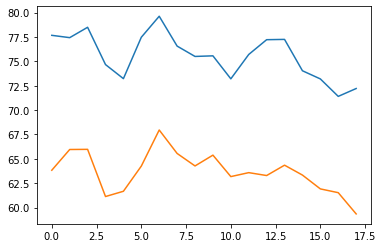

In [49]:
ppg_per_game_winner = X.groupby('season').mean().loc[:,'wscore'].values
ppg_per_game_loser = X.groupby('season').mean().loc[:,'lscore'].values
season_values = X.groupby('season').count().index.values

plt.plot(season_values, ppg_per_game_winner)
plt.plot(season_values, ppg_per_game_loser)
plt.show()

Prikazao sam linijskim grafom po sezonama koliko su timovi u prosjeku ubacivali i primali poena

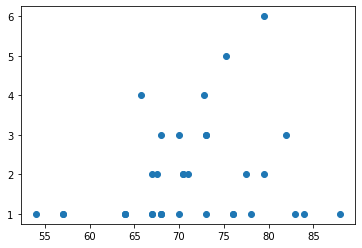

In [50]:
X =X[X.season == 17]
wins_tour = X.groupby('wteam').count().loc[:,'name']
ppg_per_game = X.groupby('wteam').mean().loc[:,'wscore'].values

plt.scatter(ppg_per_game, wins_tour)
plt.show()

Na ovom grafu rasprsenja sam prikazo koliko su timovi u zadnjoj sezoni ubacivali poena u prosjeku u turnirskom dijelu natjecanja u odnosu na koliko su pobjeda imali u turniru.

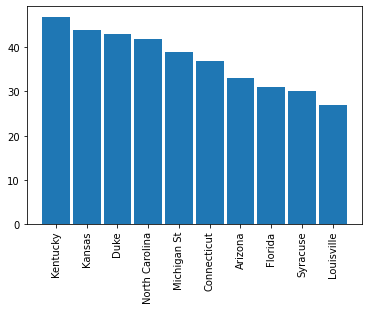

In [51]:
X = pd.merge(seasons, tourney_results, on='season', how='outer')
X = pd.merge(X, teams, left_on='wteam', right_on='id', how='outer')

wins_tour = X.groupby(['wteam','name']).count().loc[:,'daynum'].reset_index(name='count').sort_values(['count'], ascending=False).head(10)

wins_tour_names = wins_tour.loc[:,'name'].values
wins_tour_wins = wins_tour.loc[:,'count'].values

plt.bar(wins_tour_names, wins_tour_wins, width=0.9)
plt.xticks(rotation=90)
plt.show()

Ovdje sam prikazao top 10 timova sa najvise pobjeda u turnirskom djelu natjecanja

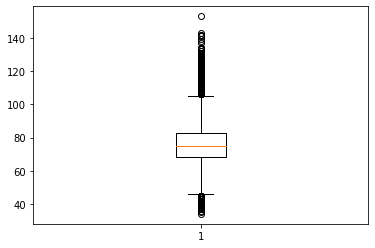

In [52]:
plt.boxplot(regular_season_results.wscore)
plt.show()

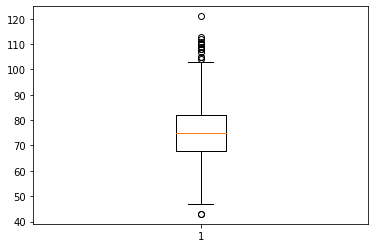

In [53]:
plt.boxplot(tourney_results.wscore)
plt.show()

Na ova dva kutijasta grafa sam prikazao brojeva zabijenih poena iako izgleda da imamo puno strsecih vrijdnosti znamo da je to sve moguce i u granicama normale jer postoje utakmice koje su imale puno produzetaka pa je rezultat mogao biti dosta visok

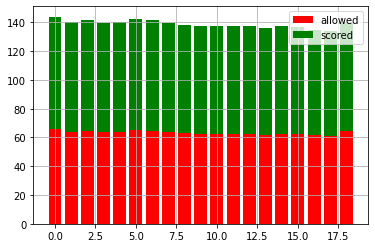

In [54]:
X = pd.merge(seasons, regular_season_results, on='season', how='outer')
X = pd.merge(X, teams, left_on='wteam', right_on='id', how='outer')

ppg_per_game_winner = X.groupby('season').mean().loc[:,'wscore'].values
ppg_per_game_loser = X.groupby('season').mean().loc[:,'lscore'].values
season_values = X.groupby('season').count().index.values

plt.bar(season_values, ppg_per_game_loser, color='red', label='allowed')
plt.bar(season_values, ppg_per_game_winner, color='green', label='scored',bottom=ppg_per_game_loser)
plt.legend(loc='best')
plt.grid()
plt.show()

Na ovom grafu sam prikazao koliko timovi u prosjeku zabijaju i primaju koseva u regularnoj sezoni te ukupni broj koseva na utakmici

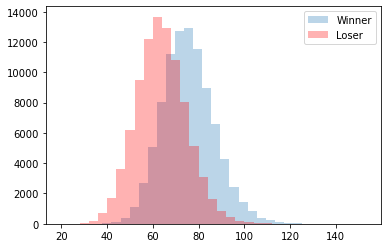

In [55]:
plt.hist(X.wscore, bins=30, label="Winner", alpha=0.3)
plt.hist(X.lscore, color='red', bins=30, alpha=0.3, label="Loser")
plt.legend(loc='best')
plt.show()

Histogram sa prikazom broja poena pobjednika i porazenih